In [1]:
import pandas as pd
import numpy as np
from prophet import Prophet
import matplotlib.pyplot as plt
from prophet.diagnostics import cross_validation, performance_metrics
from prophet.plot import plot_cross_validation_metric
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('/content/sample_data/cr.csv')

In [4]:
# Convert DATE to datetime
df.columns = ['ds', 'y']  # Rename columns to Prophet requirements
df['ds'] = pd.to_datetime(df['ds'])

In [5]:
# Remove missing values and zeros
df = df[df['y'].notna() & (df['y'] != 0)]
df = df.sort_values('ds').reset_index(drop=True)

In [6]:
print("Data Overview:")
print(df.head())
print("\nData Info:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())

Data Overview:
          ds        y
0 2023-01-06  15546.0
1 2023-01-13  32484.0
2 2023-01-20  20067.0
3 2023-02-03  22357.0
4 2023-02-10  10853.0

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      81 non-null     datetime64[ns]
 1   y       81 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.4 KB
None

Missing Values:
ds    0
y     0
dtype: int64


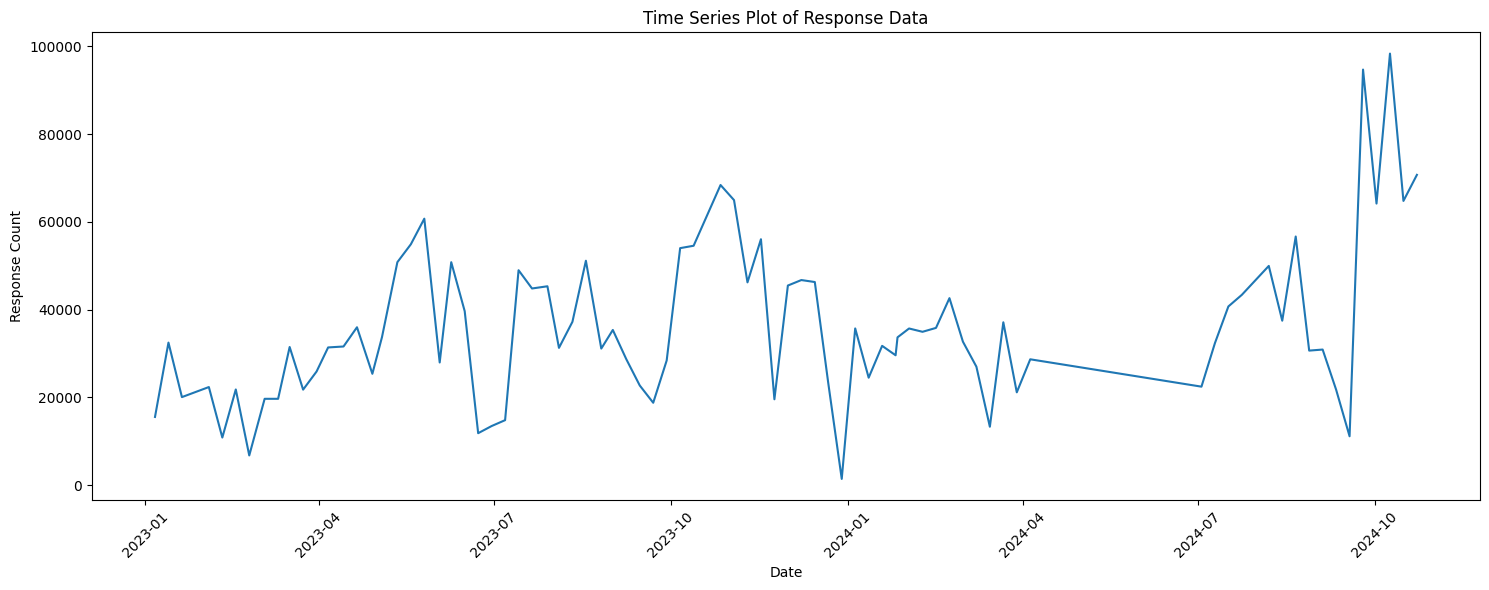

In [7]:
#Data Analysis and Visualization
plt.figure(figsize=(15, 6))
plt.plot(df['ds'], df['y'])
plt.title('Time Series Plot of Response Data')
plt.xlabel('Date')
plt.ylabel('Response Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [8]:
# Check for seasonality with decomposition
df['month'] = df['ds'].dt.month
df['day_of_week'] = df['ds'].dt.dayofweek

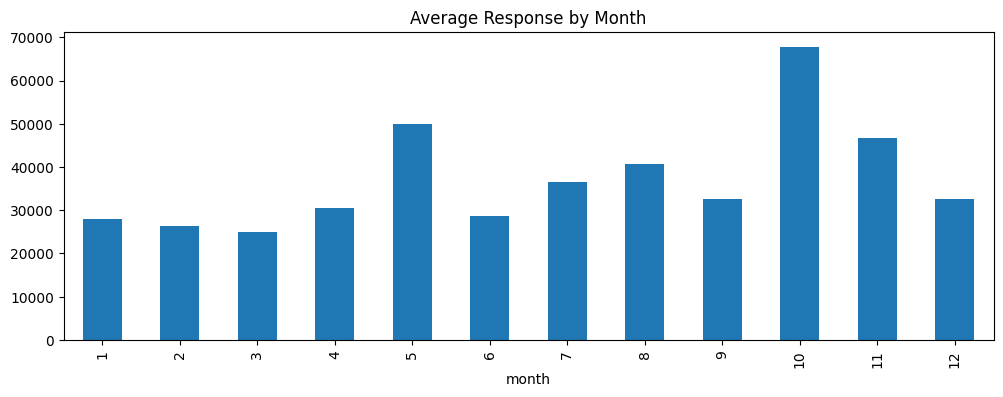

In [9]:
# Monthly pattern
monthly_avg = df.groupby('month')['y'].mean()
plt.figure(figsize=(12, 4))
monthly_avg.plot(kind='bar')
plt.title('Average Response by Month')
plt.show()

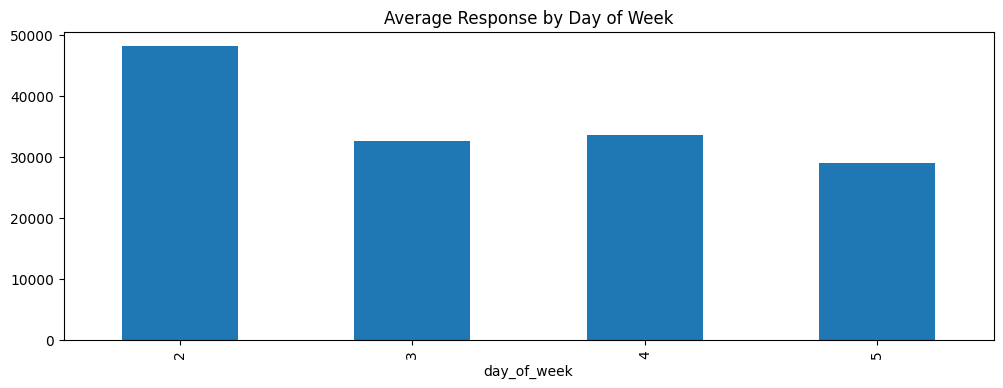

In [10]:
# Weekly pattern
weekly_avg = df.groupby('day_of_week')['y'].mean()
plt.figure(figsize=(12, 4))
weekly_avg.plot(kind='bar')
plt.title('Average Response by Day of Week')
plt.show()

In [11]:
#Hyperparameter Tuning
param_grid = {
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
    'holidays_prior_scale': [0.01, 0.1, 1.0, 10.0],
    'seasonality_mode': ['additive', 'multiplicative']
}

# Initialize best parameters and score
best_params = {}
best_rmse = float('inf')

In [12]:
# Grid search
for cp in param_grid['changepoint_prior_scale']:
    for sp in param_grid['seasonality_prior_scale']:
        for hp in param_grid['holidays_prior_scale']:
            for sm in param_grid['seasonality_mode']:

                m = Prophet(
                    changepoint_prior_scale=cp,
                    seasonality_prior_scale=sp,
                    holidays_prior_scale=hp,
                    seasonality_mode=sm,
                    weekly_seasonality=True,
                    yearly_seasonality=True
                )

                m.fit(df)

                # Cross validation
                df_cv = cross_validation(m, initial='180 days', period='30 days', horizon='90 days')
                df_p = performance_metrics(df_cv)

                # Check if this model is better
                if df_p['rmse'].mean() < best_rmse:
                    best_rmse = df_p['rmse'].mean()
                    best_params = {
                        'changepoint_prior_scale': cp,
                        'seasonality_prior_scale': sp,
                        'holidays_prior_scale': hp,
                        'seasonality_mode': sm
                    }

print("Best Parameters:", best_params)
print("Best RMSE:", best_rmse)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/28v1hgqh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/t59ef6vj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45556', 'data', 'file=/tmp/tmptigkmguv/28v1hgqh.json', 'init=/tmp/tmptigkmguv/t59ef6vj.json', 'output', 'file=/tmp/tmptigkmguv/prophet_modelm__7r8k1/prophet_model-20250217235922.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
23:59:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:59:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 13 forecasts with cutoffs between 2023-07-31 00:00:00 and 2024-07-25 00:00:00


  0%|          | 0/13 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 22.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/uset6y9h.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/1m76i_8l.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24105', 'data', 'file=/tmp/tmptigkmguv/uset6y9h.json', 'init=/tmp/tmptigkmguv/1m76i_8l.json', 'output', 'file=/tmp/tmptigkmguv/prophet_modeld42s2ou3/prophet_model-20250217235923.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
23:59:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:59:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/rob2hdf5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/atd7t3v9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:ru

  0%|          | 0/13 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 22.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/z_fig_3a.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/wn2566zt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=8689', 'data', 'file=/tmp/tmptigkmguv/z_fig_3a.json', 'init=/tmp/tmptigkmguv/wn2566zt.json', 'output', 'file=/tmp/tmptigkmguv/prophet_modelai7n_hlr/prophet_model-20250217235954.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
23:59:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:00:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/jplunu4a.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/uphd_qfd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:run

  0%|          | 0/13 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 22.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/8etozqdn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/b5teqz4t.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90870', 'data', 'file=/tmp/tmptigkmguv/8etozqdn.json', 'init=/tmp/tmptigkmguv/b5teqz4t.json', 'output', 'file=/tmp/tmptigkmguv/prophet_modelhvx89lui/prophet_model-20250218000034.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:00:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:00:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/xcmgzu5p.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/422laidx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:ru

  0%|          | 0/13 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 22.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/zfzazcss.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/ksyxuqp7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35215', 'data', 'file=/tmp/tmptigkmguv/zfzazcss.json', 'init=/tmp/tmptigkmguv/ksyxuqp7.json', 'output', 'file=/tmp/tmptigkmguv/prophet_modelroojcbk3/prophet_model-20250218000104.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:01:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:01:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/sxhtchs3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/nen9t8d0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:ru

  0%|          | 0/13 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 22.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/ewpq16rl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/yvj9uvi9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79601', 'data', 'file=/tmp/tmptigkmguv/ewpq16rl.json', 'init=/tmp/tmptigkmguv/yvj9uvi9.json', 'output', 'file=/tmp/tmptigkmguv/prophet_modely4xuax7g/prophet_model-20250218000145.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:01:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:01:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/sm70g1tt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/uazq7ncr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:ru

  0%|          | 0/13 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 22.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/bqc_dypy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/sj9hpu44.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=7301', 'data', 'file=/tmp/tmptigkmguv/bqc_dypy.json', 'init=/tmp/tmptigkmguv/sj9hpu44.json', 'output', 'file=/tmp/tmptigkmguv/prophet_model_7gbhegk/prophet_model-20250218000222.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:02:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:02:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/guokaowh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/ngwwg447.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:run

  0%|          | 0/13 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 22.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/g8ibmrfx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/g8l0bsdf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=23515', 'data', 'file=/tmp/tmptigkmguv/g8ibmrfx.json', 'init=/tmp/tmptigkmguv/g8l0bsdf.json', 'output', 'file=/tmp/tmptigkmguv/prophet_modelaiy5kirh/prophet_model-20250218000302.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:03:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:03:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/j2lh93x8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/toxvhnjm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:ru

  0%|          | 0/13 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 22.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/gx59c6ia.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/2s2xsske.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=46625', 'data', 'file=/tmp/tmptigkmguv/gx59c6ia.json', 'init=/tmp/tmptigkmguv/2s2xsske.json', 'output', 'file=/tmp/tmptigkmguv/prophet_modeltteaet19/prophet_model-20250218000333.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:03:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:03:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/mhx3a982.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/3jspbdwi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:ru

  0%|          | 0/13 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 22.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/b_j1s21a.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/8z0d7nv7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86619', 'data', 'file=/tmp/tmptigkmguv/b_j1s21a.json', 'init=/tmp/tmptigkmguv/8z0d7nv7.json', 'output', 'file=/tmp/tmptigkmguv/prophet_model07b5c5i7/prophet_model-20250218000414.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:04:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:04:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/munyirxs.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/bxw7qc_v.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:ru

  0%|          | 0/13 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 22.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/gcbzmb6n.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/0dov3ztv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=9972', 'data', 'file=/tmp/tmptigkmguv/gcbzmb6n.json', 'init=/tmp/tmptigkmguv/0dov3ztv.json', 'output', 'file=/tmp/tmptigkmguv/prophet_modelhpqrq_03/prophet_model-20250218000453.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:04:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:04:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/h4feyovm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/nx4obb0t.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:run

  0%|          | 0/13 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 22.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/tjhnbevh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/sk6v8i8e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21416', 'data', 'file=/tmp/tmptigkmguv/tjhnbevh.json', 'init=/tmp/tmptigkmguv/sk6v8i8e.json', 'output', 'file=/tmp/tmptigkmguv/prophet_model_goaslsh/prophet_model-20250218000556.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:05:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:05:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/e8qxug3c.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/nq7bnq03.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:ru

  0%|          | 0/13 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 22.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/bd0ssf7c.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/k0vk5e1j.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25145', 'data', 'file=/tmp/tmptigkmguv/bd0ssf7c.json', 'init=/tmp/tmptigkmguv/k0vk5e1j.json', 'output', 'file=/tmp/tmptigkmguv/prophet_modellfeci69p/prophet_model-20250218000635.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:06:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:06:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/bds26kve.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/jrngfnsw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:ru

  0%|          | 0/13 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 22.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/ft0ae6za.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/9_dr432r.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=22252', 'data', 'file=/tmp/tmptigkmguv/ft0ae6za.json', 'init=/tmp/tmptigkmguv/9_dr432r.json', 'output', 'file=/tmp/tmptigkmguv/prophet_modelnzyvwpkz/prophet_model-20250218000736.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:07:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:07:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/snrstvyy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/kfsvmdc_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:ru

  0%|          | 0/13 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 22.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/3vl7ig2i.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/v6ektszu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=7674', 'data', 'file=/tmp/tmptigkmguv/3vl7ig2i.json', 'init=/tmp/tmptigkmguv/v6ektszu.json', 'output', 'file=/tmp/tmptigkmguv/prophet_modelbae6phxy/prophet_model-20250218000815.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:08:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:08:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/__menglj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/9c93rhqk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:run

  0%|          | 0/13 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 22.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/i0g79qwt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/9_ff671w.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34289', 'data', 'file=/tmp/tmptigkmguv/i0g79qwt.json', 'init=/tmp/tmptigkmguv/9_ff671w.json', 'output', 'file=/tmp/tmptigkmguv/prophet_modelovnqpfgl/prophet_model-20250218000917.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:09:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:09:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/q8je0ki2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/ray_fw81.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:ru

  0%|          | 0/13 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 22.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/iu3brf4r.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/cr0qkzez.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59156', 'data', 'file=/tmp/tmptigkmguv/iu3brf4r.json', 'init=/tmp/tmptigkmguv/cr0qkzez.json', 'output', 'file=/tmp/tmptigkmguv/prophet_modely266ua41/prophet_model-20250218000956.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:09:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:09:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/v1znqr9d.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/hj3fq4mf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:ru

  0%|          | 0/13 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 22.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/br0gn4s2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/ipjyrxmg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84340', 'data', 'file=/tmp/tmptigkmguv/br0gn4s2.json', 'init=/tmp/tmptigkmguv/ipjyrxmg.json', 'output', 'file=/tmp/tmptigkmguv/prophet_model31pmvafx/prophet_model-20250218001057.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:10:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:10:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/69h_8ri4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/wrvsvqci.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:ru

  0%|          | 0/13 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 22.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/_gy5aati.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/947m99gd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3723', 'data', 'file=/tmp/tmptigkmguv/_gy5aati.json', 'init=/tmp/tmptigkmguv/947m99gd.json', 'output', 'file=/tmp/tmptigkmguv/prophet_modelo7i638tv/prophet_model-20250218001105.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:11:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:11:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/695t6ogv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/1rkl4e54.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:run

  0%|          | 0/13 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 22.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/p09k86mf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/cgt9u3ud.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73865', 'data', 'file=/tmp/tmptigkmguv/p09k86mf.json', 'init=/tmp/tmptigkmguv/cgt9u3ud.json', 'output', 'file=/tmp/tmptigkmguv/prophet_modelg_067af4/prophet_model-20250218001132.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:11:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:11:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/wcj5qol3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/j1fbogw_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:ru

  0%|          | 0/13 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 22.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/161x56zw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/ypp2ixzm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71225', 'data', 'file=/tmp/tmptigkmguv/161x56zw.json', 'init=/tmp/tmptigkmguv/ypp2ixzm.json', 'output', 'file=/tmp/tmptigkmguv/prophet_modelrdl_htk5/prophet_model-20250218001140.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:11:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:11:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/kegxg7jp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/frc1itxk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:ru

  0%|          | 0/13 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 22.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/g5rwwz45.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/c8d067ha.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66027', 'data', 'file=/tmp/tmptigkmguv/g5rwwz45.json', 'init=/tmp/tmptigkmguv/c8d067ha.json', 'output', 'file=/tmp/tmptigkmguv/prophet_modelzd4azws5/prophet_model-20250218001207.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:12:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:12:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/gza4ra4s.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/gmewezzz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:ru

  0%|          | 0/13 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 22.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/gdq2fw4f.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/jyg_qrw6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50879', 'data', 'file=/tmp/tmptigkmguv/gdq2fw4f.json', 'init=/tmp/tmptigkmguv/jyg_qrw6.json', 'output', 'file=/tmp/tmptigkmguv/prophet_model62tcoky2/prophet_model-20250218001215.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:12:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:12:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/r1exupf_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/bwitq8uv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:ru

  0%|          | 0/13 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 22.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/rgh48sxm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/mld_o4mn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4687', 'data', 'file=/tmp/tmptigkmguv/rgh48sxm.json', 'init=/tmp/tmptigkmguv/mld_o4mn.json', 'output', 'file=/tmp/tmptigkmguv/prophet_modelmd2egdw0/prophet_model-20250218001243.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:12:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:12:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/anqx2dhh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/r1odkns_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:run

  0%|          | 0/13 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 22.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/_sl67efe.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/i_96tkrn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45379', 'data', 'file=/tmp/tmptigkmguv/_sl67efe.json', 'init=/tmp/tmptigkmguv/i_96tkrn.json', 'output', 'file=/tmp/tmptigkmguv/prophet_model9lzrni98/prophet_model-20250218001250.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:12:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:12:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/gpdm0f25.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/rqr43i48.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:ru

  0%|          | 0/13 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 22.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/oew4f5gh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/rlr5485v.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32761', 'data', 'file=/tmp/tmptigkmguv/oew4f5gh.json', 'init=/tmp/tmptigkmguv/rlr5485v.json', 'output', 'file=/tmp/tmptigkmguv/prophet_model2kvnqqm9/prophet_model-20250218001318.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:13:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:13:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/vjc2qnm4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/ecnu7h6_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:ru

  0%|          | 0/13 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 22.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/01_oa8p4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/r77yzzry.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85855', 'data', 'file=/tmp/tmptigkmguv/01_oa8p4.json', 'init=/tmp/tmptigkmguv/r77yzzry.json', 'output', 'file=/tmp/tmptigkmguv/prophet_modelvryc3toh/prophet_model-20250218001336.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:13:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:13:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/dp60u6cc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/etzbv5kq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:ru

  0%|          | 0/13 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 22.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/06y9_npt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/d_nl5clf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20912', 'data', 'file=/tmp/tmptigkmguv/06y9_npt.json', 'init=/tmp/tmptigkmguv/d_nl5clf.json', 'output', 'file=/tmp/tmptigkmguv/prophet_model7vf5p3nd/prophet_model-20250218001345.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:13:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:13:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/8ctytbbd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/q5197v0r.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:ru

  0%|          | 0/13 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 22.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/yivav7ok.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/l_flqi3e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=69195', 'data', 'file=/tmp/tmptigkmguv/yivav7ok.json', 'init=/tmp/tmptigkmguv/l_flqi3e.json', 'output', 'file=/tmp/tmptigkmguv/prophet_modelrh0c66b5/prophet_model-20250218001403.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:14:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:14:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/f31xeaw5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/ojaoazlp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:ru

  0%|          | 0/13 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 22.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/2m1w5a7x.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/hb8i_9o8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34890', 'data', 'file=/tmp/tmptigkmguv/2m1w5a7x.json', 'init=/tmp/tmptigkmguv/hb8i_9o8.json', 'output', 'file=/tmp/tmptigkmguv/prophet_modelupg776au/prophet_model-20250218001412.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:14:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:14:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/2am_0uqd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/sjuftsek.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:ru

  0%|          | 0/13 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 22.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/co9ev2ef.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/erigpmoi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86519', 'data', 'file=/tmp/tmptigkmguv/co9ev2ef.json', 'init=/tmp/tmptigkmguv/erigpmoi.json', 'output', 'file=/tmp/tmptigkmguv/prophet_model5tzbm_45/prophet_model-20250218001430.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:14:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:14:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/rhyyaepk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/k6bbnzjn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:ru

  0%|          | 0/13 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 22.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/mffq8mvt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/eeouml06.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84482', 'data', 'file=/tmp/tmptigkmguv/mffq8mvt.json', 'init=/tmp/tmptigkmguv/eeouml06.json', 'output', 'file=/tmp/tmptigkmguv/prophet_modelbndkdmat/prophet_model-20250218001439.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:14:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:14:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/jtlr1jh6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/1pe8jzz7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:ru

  0%|          | 0/13 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 22.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/1mrqxqw7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/s80085cs.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16284', 'data', 'file=/tmp/tmptigkmguv/1mrqxqw7.json', 'init=/tmp/tmptigkmguv/s80085cs.json', 'output', 'file=/tmp/tmptigkmguv/prophet_modelj_50b5mc/prophet_model-20250218001456.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:14:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:14:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/94_00gc0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/iu3lxq8i.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:ru

  0%|          | 0/13 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 22.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/9rgzjqxu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/_qh117sx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=58210', 'data', 'file=/tmp/tmptigkmguv/9rgzjqxu.json', 'init=/tmp/tmptigkmguv/_qh117sx.json', 'output', 'file=/tmp/tmptigkmguv/prophet_model95ym5lb8/prophet_model-20250218001506.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:15:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:15:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/atfb0ahq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/tv7kpb8o.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:ru

  0%|          | 0/13 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 22.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/uunlbr08.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/rr2_h24j.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57252', 'data', 'file=/tmp/tmptigkmguv/uunlbr08.json', 'init=/tmp/tmptigkmguv/rr2_h24j.json', 'output', 'file=/tmp/tmptigkmguv/prophet_modelvcevl2pd/prophet_model-20250218001511.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:15:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:15:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/8z6_2d2o.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/odwt3p3d.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:ru

  0%|          | 0/13 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 22.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/vv_ce616.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/xitsu5wp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2845', 'data', 'file=/tmp/tmptigkmguv/vv_ce616.json', 'init=/tmp/tmptigkmguv/xitsu5wp.json', 'output', 'file=/tmp/tmptigkmguv/prophet_model0o4apwp4/prophet_model-20250218001515.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:15:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:15:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/43ar71ff.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/qvsma8da.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:run

  0%|          | 0/13 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 22.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/qy17x9ou.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/n2l987vm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34151', 'data', 'file=/tmp/tmptigkmguv/qy17x9ou.json', 'init=/tmp/tmptigkmguv/n2l987vm.json', 'output', 'file=/tmp/tmptigkmguv/prophet_model6hj__ojn/prophet_model-20250218001521.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:15:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:15:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/rn85uc7t.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/iyznz_lg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:ru

  0%|          | 0/13 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 22.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/xq9ufcpt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/dpnpiiyh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89519', 'data', 'file=/tmp/tmptigkmguv/xq9ufcpt.json', 'init=/tmp/tmptigkmguv/dpnpiiyh.json', 'output', 'file=/tmp/tmptigkmguv/prophet_model3k6au5al/prophet_model-20250218001525.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:15:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:15:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/r_13y3vl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/shn6rkei.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:ru

  0%|          | 0/13 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 22.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/m7wzuqlb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/stq08m9h.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84623', 'data', 'file=/tmp/tmptigkmguv/m7wzuqlb.json', 'init=/tmp/tmptigkmguv/stq08m9h.json', 'output', 'file=/tmp/tmptigkmguv/prophet_model87cls8dz/prophet_model-20250218001530.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:15:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:15:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/zu0gs1a4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/6tvn_kb3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:ru

  0%|          | 0/13 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 22.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/b5z5_91l.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/ow0fmi1b.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91', 'data', 'file=/tmp/tmptigkmguv/b5z5_91l.json', 'init=/tmp/tmptigkmguv/ow0fmi1b.json', 'output', 'file=/tmp/tmptigkmguv/prophet_model351zx2su/prophet_model-20250218001535.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:15:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:15:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/84evlyox.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/9x9zfkdm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:runni

  0%|          | 0/13 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 22.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/vheynxt8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/7hz1b2kc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20361', 'data', 'file=/tmp/tmptigkmguv/vheynxt8.json', 'init=/tmp/tmptigkmguv/7hz1b2kc.json', 'output', 'file=/tmp/tmptigkmguv/prophet_modelf9ddu4c2/prophet_model-20250218001540.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:15:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:15:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/lqpfr4ge.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/ns0umz_2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:ru

  0%|          | 0/13 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 22.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/0ceimdbz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/v_0j55q2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=58139', 'data', 'file=/tmp/tmptigkmguv/0ceimdbz.json', 'init=/tmp/tmptigkmguv/v_0j55q2.json', 'output', 'file=/tmp/tmptigkmguv/prophet_model77s0k34o/prophet_model-20250218001545.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:15:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:15:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/_finw26i.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/0sn48846.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:ru

  0%|          | 0/13 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 22.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/zf0gtjyo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/awq7lhkp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41548', 'data', 'file=/tmp/tmptigkmguv/zf0gtjyo.json', 'init=/tmp/tmptigkmguv/awq7lhkp.json', 'output', 'file=/tmp/tmptigkmguv/prophet_model9o929ahk/prophet_model-20250218001550.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:15:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:15:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/1skwwfcb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/r976glht.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:ru

  0%|          | 0/13 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 22.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/zq4pj4qu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/5_xx0gd_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40299', 'data', 'file=/tmp/tmptigkmguv/zq4pj4qu.json', 'init=/tmp/tmptigkmguv/5_xx0gd_.json', 'output', 'file=/tmp/tmptigkmguv/prophet_modellzj6tlr0/prophet_model-20250218001555.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:15:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:15:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/q6kc927h.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/99z11lap.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:ru

  0%|          | 0/13 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 22.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/oup_mf5i.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/sy9200xp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67055', 'data', 'file=/tmp/tmptigkmguv/oup_mf5i.json', 'init=/tmp/tmptigkmguv/sy9200xp.json', 'output', 'file=/tmp/tmptigkmguv/prophet_model_qi624h0/prophet_model-20250218001600.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:16:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:16:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/li4zwz3t.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/jibyz6sn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:ru

  0%|          | 0/13 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 22.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/yhummkuw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/6y4jobwr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=22714', 'data', 'file=/tmp/tmptigkmguv/yhummkuw.json', 'init=/tmp/tmptigkmguv/6y4jobwr.json', 'output', 'file=/tmp/tmptigkmguv/prophet_modellx4y2r4m/prophet_model-20250218001605.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:16:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:16:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/mx2xsl86.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/i6zxklgw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:ru

  0%|          | 0/13 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 22.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/3nf0vk48.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/e858vq0x.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31384', 'data', 'file=/tmp/tmptigkmguv/3nf0vk48.json', 'init=/tmp/tmptigkmguv/e858vq0x.json', 'output', 'file=/tmp/tmptigkmguv/prophet_modeltx4ctwgv/prophet_model-20250218001610.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:16:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:16:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/bvz4c4xc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/ijrxqbbw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:ru

  0%|          | 0/13 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 22.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/4llg79xx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/r6kkw2r9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66051', 'data', 'file=/tmp/tmptigkmguv/4llg79xx.json', 'init=/tmp/tmptigkmguv/r6kkw2r9.json', 'output', 'file=/tmp/tmptigkmguv/prophet_modellmvuw8xr/prophet_model-20250218001616.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:16:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:16:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/lug2mojt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/0zuegbvq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:ru

  0%|          | 0/13 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 22.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/xpyw3yfe.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/v50z11lz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63061', 'data', 'file=/tmp/tmptigkmguv/xpyw3yfe.json', 'init=/tmp/tmptigkmguv/v50z11lz.json', 'output', 'file=/tmp/tmptigkmguv/prophet_model7vox_p3x/prophet_model-20250218001621.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:16:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:16:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/ujy01ate.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/fcix3pa3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:ru

  0%|          | 0/13 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 22.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/f3rc78i6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/x84qclxv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36955', 'data', 'file=/tmp/tmptigkmguv/f3rc78i6.json', 'init=/tmp/tmptigkmguv/x84qclxv.json', 'output', 'file=/tmp/tmptigkmguv/prophet_modeltxcay5om/prophet_model-20250218001626.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:16:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:16:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/qjmp9lgh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/nimq9rsl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:ru

  0%|          | 0/13 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 22.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/i9klm85o.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/6amswaey.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30385', 'data', 'file=/tmp/tmptigkmguv/i9klm85o.json', 'init=/tmp/tmptigkmguv/6amswaey.json', 'output', 'file=/tmp/tmptigkmguv/prophet_modelc3ka3w89/prophet_model-20250218001633.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:16:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:16:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/apzmo7wj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/e9p88z6d.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:ru

  0%|          | 0/13 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 22.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/1aw0xk2e.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/airzy2e1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92018', 'data', 'file=/tmp/tmptigkmguv/1aw0xk2e.json', 'init=/tmp/tmptigkmguv/airzy2e1.json', 'output', 'file=/tmp/tmptigkmguv/prophet_model4dvn3vh_/prophet_model-20250218001644.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:16:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:16:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/j4wxxeq7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/68n8_l1f.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:ru

  0%|          | 0/13 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 22.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/medey3zw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/a7r3cyun.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63271', 'data', 'file=/tmp/tmptigkmguv/medey3zw.json', 'init=/tmp/tmptigkmguv/a7r3cyun.json', 'output', 'file=/tmp/tmptigkmguv/prophet_model3n2zcynd/prophet_model-20250218001650.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:16:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:16:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/0b1z12q8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/5j4wdqr6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:ru

  0%|          | 0/13 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 22.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/5e7fx65b.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/eqfnsgkf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44260', 'data', 'file=/tmp/tmptigkmguv/5e7fx65b.json', 'init=/tmp/tmptigkmguv/eqfnsgkf.json', 'output', 'file=/tmp/tmptigkmguv/prophet_model1eq5_bnl/prophet_model-20250218001700.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:17:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:17:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/6u01n31c.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/49hlqw_t.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:ru

  0%|          | 0/13 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 22.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/7wd67jap.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/32xw002s.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54787', 'data', 'file=/tmp/tmptigkmguv/7wd67jap.json', 'init=/tmp/tmptigkmguv/32xw002s.json', 'output', 'file=/tmp/tmptigkmguv/prophet_model6x5g5n1k/prophet_model-20250218001707.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:17:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:17:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/kkf57_rn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/mt7e8olt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:ru

  0%|          | 0/13 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 22.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/39v76due.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/yiwty7w6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=69276', 'data', 'file=/tmp/tmptigkmguv/39v76due.json', 'init=/tmp/tmptigkmguv/yiwty7w6.json', 'output', 'file=/tmp/tmptigkmguv/prophet_model20hnomc7/prophet_model-20250218001717.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:17:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:17:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/szxwdwuf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/fto18872.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:ru

  0%|          | 0/13 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 22.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/1_dwjqhy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/6hxhsb2h.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73017', 'data', 'file=/tmp/tmptigkmguv/1_dwjqhy.json', 'init=/tmp/tmptigkmguv/6hxhsb2h.json', 'output', 'file=/tmp/tmptigkmguv/prophet_modelw5993750/prophet_model-20250218001725.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:17:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:17:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/dhgkudtu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/5n366jdt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:ru

  0%|          | 0/13 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 22.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/fr27j1lk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/bbeeb19v.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60935', 'data', 'file=/tmp/tmptigkmguv/fr27j1lk.json', 'init=/tmp/tmptigkmguv/bbeeb19v.json', 'output', 'file=/tmp/tmptigkmguv/prophet_modeld_o12bvh/prophet_model-20250218001735.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:17:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:17:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/x4775l0s.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/uqx2qa07.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:ru

  0%|          | 0/13 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 22.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/3dhx6eln.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/_po3gmpq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19065', 'data', 'file=/tmp/tmptigkmguv/3dhx6eln.json', 'init=/tmp/tmptigkmguv/_po3gmpq.json', 'output', 'file=/tmp/tmptigkmguv/prophet_modelki823b7p/prophet_model-20250218001741.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:17:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:17:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/95plfvrp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/o9n8fn14.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:ru

  0%|          | 0/13 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 22.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/921p4gmm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/ao5wp7lj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13977', 'data', 'file=/tmp/tmptigkmguv/921p4gmm.json', 'init=/tmp/tmptigkmguv/ao5wp7lj.json', 'output', 'file=/tmp/tmptigkmguv/prophet_model46fdo7n4/prophet_model-20250218001748.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:17:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:17:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/picr1ffw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/3ipzz0nf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:ru

  0%|          | 0/13 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 22.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/0bu7wwn1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/wbngt8gr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82338', 'data', 'file=/tmp/tmptigkmguv/0bu7wwn1.json', 'init=/tmp/tmptigkmguv/wbngt8gr.json', 'output', 'file=/tmp/tmptigkmguv/prophet_modelck0q75ql/prophet_model-20250218001754.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:17:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:17:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/wpj61ywq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/68_ebh1m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:ru

  0%|          | 0/13 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 22.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/nedwqj6z.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/itsjyabh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10449', 'data', 'file=/tmp/tmptigkmguv/nedwqj6z.json', 'init=/tmp/tmptigkmguv/itsjyabh.json', 'output', 'file=/tmp/tmptigkmguv/prophet_modela0461mdo/prophet_model-20250218001801.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:18:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:18:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/lzt72u4o.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/f0usf5zr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:ru

  0%|          | 0/13 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 22.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/9h0yu30j.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/t5jpxsky.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78548', 'data', 'file=/tmp/tmptigkmguv/9h0yu30j.json', 'init=/tmp/tmptigkmguv/t5jpxsky.json', 'output', 'file=/tmp/tmptigkmguv/prophet_modely9dbpu46/prophet_model-20250218001808.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:18:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:18:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/vwyji1jl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/g763vfl2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:ru

  0%|          | 0/13 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 22.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/4vm0z5t8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/cq990d7e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6750', 'data', 'file=/tmp/tmptigkmguv/4vm0z5t8.json', 'init=/tmp/tmptigkmguv/cq990d7e.json', 'output', 'file=/tmp/tmptigkmguv/prophet_modelmecrles7/prophet_model-20250218001815.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:18:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:18:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/i3stmz31.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/5ysybd5w.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:run

  0%|          | 0/13 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 22.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/004jo6me.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/_ov262iu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=46419', 'data', 'file=/tmp/tmptigkmguv/004jo6me.json', 'init=/tmp/tmptigkmguv/_ov262iu.json', 'output', 'file=/tmp/tmptigkmguv/prophet_modelrc1p6rve/prophet_model-20250218001821.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:18:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:18:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/cyyzkrq5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/dqy2ef5i.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:ru

  0%|          | 0/13 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 22.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/dy34ya_4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/yig8coeh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12112', 'data', 'file=/tmp/tmptigkmguv/dy34ya_4.json', 'init=/tmp/tmptigkmguv/yig8coeh.json', 'output', 'file=/tmp/tmptigkmguv/prophet_modelip_f_jmo/prophet_model-20250218001828.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:18:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:18:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/dwsnzig2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/gnusu6l1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:ru

  0%|          | 0/13 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 22.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/bbxqlyqo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/z9g2i_kp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95570', 'data', 'file=/tmp/tmptigkmguv/bbxqlyqo.json', 'init=/tmp/tmptigkmguv/z9g2i_kp.json', 'output', 'file=/tmp/tmptigkmguv/prophet_modelt8mgzu07/prophet_model-20250218001835.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:18:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:18:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/0b1fn3x5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/_30wsj14.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:ru

  0%|          | 0/13 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 22.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/36c8cvh5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/v2ox3rjp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94162', 'data', 'file=/tmp/tmptigkmguv/36c8cvh5.json', 'init=/tmp/tmptigkmguv/v2ox3rjp.json', 'output', 'file=/tmp/tmptigkmguv/prophet_modelrucahzpq/prophet_model-20250218001842.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:18:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:18:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/5hurtfat.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/m1pxm7_n.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:ru

  0%|          | 0/13 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 22.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/hq3mvmli.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/qq_qa4hh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=8378', 'data', 'file=/tmp/tmptigkmguv/hq3mvmli.json', 'init=/tmp/tmptigkmguv/qq_qa4hh.json', 'output', 'file=/tmp/tmptigkmguv/prophet_modelmemecsfn/prophet_model-20250218001849.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:18:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:18:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/xnbpu_h9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/rw7wpltk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:run

  0%|          | 0/13 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 22.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/gy7de_fe.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/xb4g3lgq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89168', 'data', 'file=/tmp/tmptigkmguv/gy7de_fe.json', 'init=/tmp/tmptigkmguv/xb4g3lgq.json', 'output', 'file=/tmp/tmptigkmguv/prophet_model9o06crqo/prophet_model-20250218001855.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:18:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:18:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/u_4nhihx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/wai6_qgf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:ru

  0%|          | 0/13 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 22.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/1auirfip.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/1lckc9ty.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=56223', 'data', 'file=/tmp/tmptigkmguv/1auirfip.json', 'init=/tmp/tmptigkmguv/1lckc9ty.json', 'output', 'file=/tmp/tmptigkmguv/prophet_model6ejvh8m8/prophet_model-20250218001902.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:19:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:19:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/po6il8ax.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/pzd2ws2e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:ru

  0%|          | 0/13 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 22.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/lnwpzdbz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/y6g3gwxv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=55930', 'data', 'file=/tmp/tmptigkmguv/lnwpzdbz.json', 'init=/tmp/tmptigkmguv/y6g3gwxv.json', 'output', 'file=/tmp/tmptigkmguv/prophet_modelt7q1stia/prophet_model-20250218001908.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:19:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:19:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/1xqxy05a.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/zhcwlfm8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:ru

  0%|          | 0/13 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 22.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/ljm95ru0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/hixa0mt8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89647', 'data', 'file=/tmp/tmptigkmguv/ljm95ru0.json', 'init=/tmp/tmptigkmguv/hixa0mt8.json', 'output', 'file=/tmp/tmptigkmguv/prophet_modeliknd5788/prophet_model-20250218001915.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:19:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:19:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/6jcnp1wq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/85bi_a_4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:ru

  0%|          | 0/13 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 22.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/fhf3py7z.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/vp57xfog.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=9303', 'data', 'file=/tmp/tmptigkmguv/fhf3py7z.json', 'init=/tmp/tmptigkmguv/vp57xfog.json', 'output', 'file=/tmp/tmptigkmguv/prophet_modeltuaydgji/prophet_model-20250218001921.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:19:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:19:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/pr9liyix.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/u7ib6esq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:run

  0%|          | 0/13 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 22.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/k9qr6jvg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/kea6m504.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13853', 'data', 'file=/tmp/tmptigkmguv/k9qr6jvg.json', 'init=/tmp/tmptigkmguv/kea6m504.json', 'output', 'file=/tmp/tmptigkmguv/prophet_model8ecjvqqa/prophet_model-20250218001928.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:19:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:19:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/rsugvycy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/7gv5g_d9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:ru

  0%|          | 0/13 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 22.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/xjzznx40.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/thm20dqu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34595', 'data', 'file=/tmp/tmptigkmguv/xjzznx40.json', 'init=/tmp/tmptigkmguv/thm20dqu.json', 'output', 'file=/tmp/tmptigkmguv/prophet_modele86dwa0e/prophet_model-20250218001934.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:19:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:19:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/2rabkwm8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/20110yem.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:ru

  0%|          | 0/13 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 22.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/1npu53dx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/7jpbpawa.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72747', 'data', 'file=/tmp/tmptigkmguv/1npu53dx.json', 'init=/tmp/tmptigkmguv/7jpbpawa.json', 'output', 'file=/tmp/tmptigkmguv/prophet_modelluhs4u1o/prophet_model-20250218001940.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:19:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:19:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/k_d6qjn5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/t6bflxiu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:ru

  0%|          | 0/13 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 22.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/ssdf5qh_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/ci8ce18i.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20532', 'data', 'file=/tmp/tmptigkmguv/ssdf5qh_.json', 'init=/tmp/tmptigkmguv/ci8ce18i.json', 'output', 'file=/tmp/tmptigkmguv/prophet_modelugeffkye/prophet_model-20250218001947.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:19:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:19:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/tsl5gido.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/8m6eio34.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:ru

  0%|          | 0/13 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 22.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/qjy789rw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/d2kttatx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19768', 'data', 'file=/tmp/tmptigkmguv/qjy789rw.json', 'init=/tmp/tmptigkmguv/d2kttatx.json', 'output', 'file=/tmp/tmptigkmguv/prophet_model5mzi56le/prophet_model-20250218001953.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:19:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:19:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/64_r1ki6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/h6zcfeli.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:ru

  0%|          | 0/13 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 22.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/xtb5k74x.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/hiq1imna.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26861', 'data', 'file=/tmp/tmptigkmguv/xtb5k74x.json', 'init=/tmp/tmptigkmguv/hiq1imna.json', 'output', 'file=/tmp/tmptigkmguv/prophet_modelu4tbyypw/prophet_model-20250218002000.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:20:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:20:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/t359xur_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/dqmqj0u_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:ru

  0%|          | 0/13 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 22.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/xz_4k98n.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/_y9c2p4x.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=15492', 'data', 'file=/tmp/tmptigkmguv/xz_4k98n.json', 'init=/tmp/tmptigkmguv/_y9c2p4x.json', 'output', 'file=/tmp/tmptigkmguv/prophet_modeltpsnml9e/prophet_model-20250218002005.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:20:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:20:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/szp7md7f.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/8y97gaqc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:ru

  0%|          | 0/13 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 22.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/u8kxd2me.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/jtz5hkl7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95671', 'data', 'file=/tmp/tmptigkmguv/u8kxd2me.json', 'init=/tmp/tmptigkmguv/jtz5hkl7.json', 'output', 'file=/tmp/tmptigkmguv/prophet_modelh3kfb8cm/prophet_model-20250218002013.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:20:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:20:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/0xioqk88.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/7fw4psaj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:ru

  0%|          | 0/13 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 22.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/xri135s3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/_lm3cqjf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96025', 'data', 'file=/tmp/tmptigkmguv/xri135s3.json', 'init=/tmp/tmptigkmguv/_lm3cqjf.json', 'output', 'file=/tmp/tmptigkmguv/prophet_models_n281iu/prophet_model-20250218002019.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:20:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:20:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/v0wrsnpb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/xzj4a0wl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:ru

  0%|          | 0/13 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 22.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/y9soamyk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/sam91a2h.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91810', 'data', 'file=/tmp/tmptigkmguv/y9soamyk.json', 'init=/tmp/tmptigkmguv/sam91a2h.json', 'output', 'file=/tmp/tmptigkmguv/prophet_modelnizbhd2j/prophet_model-20250218002027.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:20:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:20:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/av9wre37.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/0zghwcbh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:ru

  0%|          | 0/13 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 22.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/6_9l0p47.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/9aeicj9y.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3250', 'data', 'file=/tmp/tmptigkmguv/6_9l0p47.json', 'init=/tmp/tmptigkmguv/9aeicj9y.json', 'output', 'file=/tmp/tmptigkmguv/prophet_model8wbfvul8/prophet_model-20250218002033.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:20:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:20:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/6ideqyha.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/w25l1b1v.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:run

  0%|          | 0/13 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 22.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/ib1op98_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/1hpn8sch.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88905', 'data', 'file=/tmp/tmptigkmguv/ib1op98_.json', 'init=/tmp/tmptigkmguv/1hpn8sch.json', 'output', 'file=/tmp/tmptigkmguv/prophet_model4114nv6o/prophet_model-20250218002042.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:20:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:20:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/1v5or3po.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/bxysnpvo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:ru

  0%|          | 0/13 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 22.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/uebgngmu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/hv9527we.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24567', 'data', 'file=/tmp/tmptigkmguv/uebgngmu.json', 'init=/tmp/tmptigkmguv/hv9527we.json', 'output', 'file=/tmp/tmptigkmguv/prophet_model9x6cfsht/prophet_model-20250218002048.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:20:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:20:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/5f1csrv_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/b5v9jilc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:ru

  0%|          | 0/13 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 22.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/66pwqno2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/cv60dfmd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92857', 'data', 'file=/tmp/tmptigkmguv/66pwqno2.json', 'init=/tmp/tmptigkmguv/cv60dfmd.json', 'output', 'file=/tmp/tmptigkmguv/prophet_modelldntpc3a/prophet_model-20250218002057.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:20:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:20:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/5jz490pr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/n38_2_jp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:ru

  0%|          | 0/13 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 22.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/bap74vqt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/7owqcr8n.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=29509', 'data', 'file=/tmp/tmptigkmguv/bap74vqt.json', 'init=/tmp/tmptigkmguv/7owqcr8n.json', 'output', 'file=/tmp/tmptigkmguv/prophet_modelq_8nxhej/prophet_model-20250218002103.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:21:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:21:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/2jg15htm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/2mnlhrqh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:ru

  0%|          | 0/13 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 22.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/dxd07q00.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/wh829uju.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82530', 'data', 'file=/tmp/tmptigkmguv/dxd07q00.json', 'init=/tmp/tmptigkmguv/wh829uju.json', 'output', 'file=/tmp/tmptigkmguv/prophet_modelqb8skmx9/prophet_model-20250218002112.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:21:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:21:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/gzsyf8qj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/i8nkyojw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:ru

  0%|          | 0/13 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 22.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/ll5_kha7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/m_vi3jbd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51975', 'data', 'file=/tmp/tmptigkmguv/ll5_kha7.json', 'init=/tmp/tmptigkmguv/m_vi3jbd.json', 'output', 'file=/tmp/tmptigkmguv/prophet_modeli3psjcc1/prophet_model-20250218002117.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:21:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:21:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/p5ytw1lk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/hd0sk9l0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:ru

  0%|          | 0/13 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 22.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/ud5hd9za.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/2zpfw9k4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43569', 'data', 'file=/tmp/tmptigkmguv/ud5hd9za.json', 'init=/tmp/tmptigkmguv/2zpfw9k4.json', 'output', 'file=/tmp/tmptigkmguv/prophet_modelzighq6ce/prophet_model-20250218002126.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:21:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:21:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/6v_ch79v.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/rmtgtno6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:ru

  0%|          | 0/13 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 22.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/xl4m1t9e.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/5_nvn0bz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78642', 'data', 'file=/tmp/tmptigkmguv/xl4m1t9e.json', 'init=/tmp/tmptigkmguv/5_nvn0bz.json', 'output', 'file=/tmp/tmptigkmguv/prophet_modelgwcfv2zt/prophet_model-20250218002132.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:21:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:21:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/byis7650.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/5m4tp6sy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:ru

  0%|          | 0/13 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 22.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/uupqoip_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/deop_zni.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=46978', 'data', 'file=/tmp/tmptigkmguv/uupqoip_.json', 'init=/tmp/tmptigkmguv/deop_zni.json', 'output', 'file=/tmp/tmptigkmguv/prophet_modelj0yj_aez/prophet_model-20250218002140.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:21:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:21:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/c__eb6gj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/qdx2g7ti.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:ru

  0%|          | 0/13 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 22.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/y09aqwxg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/xdvl9hg_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=55238', 'data', 'file=/tmp/tmptigkmguv/y09aqwxg.json', 'init=/tmp/tmptigkmguv/xdvl9hg_.json', 'output', 'file=/tmp/tmptigkmguv/prophet_model9z5nadxh/prophet_model-20250218002146.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:21:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:21:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/7olnmiej.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/h8q7lva5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:ru

  0%|          | 0/13 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 22.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/jm9xk4yr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/jl93_n_5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60142', 'data', 'file=/tmp/tmptigkmguv/jm9xk4yr.json', 'init=/tmp/tmptigkmguv/jl93_n_5.json', 'output', 'file=/tmp/tmptigkmguv/prophet_modelat7z7j9y/prophet_model-20250218002155.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:21:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:21:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/efi28g90.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/byeee5mf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:ru

  0%|          | 0/13 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 22.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/0e5fqc92.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/9p5c2h0w.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25079', 'data', 'file=/tmp/tmptigkmguv/0e5fqc92.json', 'init=/tmp/tmptigkmguv/9p5c2h0w.json', 'output', 'file=/tmp/tmptigkmguv/prophet_modelt8ys1ww8/prophet_model-20250218002201.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:22:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:22:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/692bashv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/5vjqhvc6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:ru

  0%|          | 0/13 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 22.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/bjqyv4x5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/0nwb0tgl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61741', 'data', 'file=/tmp/tmptigkmguv/bjqyv4x5.json', 'init=/tmp/tmptigkmguv/0nwb0tgl.json', 'output', 'file=/tmp/tmptigkmguv/prophet_modeluaf3n24b/prophet_model-20250218002209.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:22:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:22:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/r3clnaxg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/p1glskbe.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:ru

  0%|          | 0/13 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 22.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/h6b6z62m.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/f9mwb7uy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26583', 'data', 'file=/tmp/tmptigkmguv/h6b6z62m.json', 'init=/tmp/tmptigkmguv/f9mwb7uy.json', 'output', 'file=/tmp/tmptigkmguv/prophet_modelftixndi9/prophet_model-20250218002220.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:22:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:22:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/kfjxo7vk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/a61mepoq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:ru

  0%|          | 0/13 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 22.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/ky8v90_5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/xsrkjs96.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63005', 'data', 'file=/tmp/tmptigkmguv/ky8v90_5.json', 'init=/tmp/tmptigkmguv/xsrkjs96.json', 'output', 'file=/tmp/tmptigkmguv/prophet_model2zuw0h9l/prophet_model-20250218002230.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:22:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:22:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/w866gyfi.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/0rtlbl9s.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:ru

  0%|          | 0/13 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 22.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/nl6uyhn3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/cz4ahx6l.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30438', 'data', 'file=/tmp/tmptigkmguv/nl6uyhn3.json', 'init=/tmp/tmptigkmguv/cz4ahx6l.json', 'output', 'file=/tmp/tmptigkmguv/prophet_model50_n3609/prophet_model-20250218002239.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:22:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:22:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/pvqgmesr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/bdkdt4y8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:ru

  0%|          | 0/13 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 22.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/7hnw8qvf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/hpfi5l18.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49004', 'data', 'file=/tmp/tmptigkmguv/7hnw8qvf.json', 'init=/tmp/tmptigkmguv/hpfi5l18.json', 'output', 'file=/tmp/tmptigkmguv/prophet_modelse329gaf/prophet_model-20250218002249.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:22:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:22:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/dee4m99o.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/w0q1viww.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:ru

  0%|          | 0/13 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 22.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/ucalk4_a.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/r7uiy8fg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=29946', 'data', 'file=/tmp/tmptigkmguv/ucalk4_a.json', 'init=/tmp/tmptigkmguv/r7uiy8fg.json', 'output', 'file=/tmp/tmptigkmguv/prophet_modelkhgy3nvu/prophet_model-20250218002259.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:22:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:22:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/nxjpps1a.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/_j6e72iw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:ru

  0%|          | 0/13 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 22.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/u2oztqjd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/kfkx0lyl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94938', 'data', 'file=/tmp/tmptigkmguv/u2oztqjd.json', 'init=/tmp/tmptigkmguv/kfkx0lyl.json', 'output', 'file=/tmp/tmptigkmguv/prophet_model1clhowcg/prophet_model-20250218002308.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:23:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:23:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/jo3c68ju.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/2y9ogujr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:ru

  0%|          | 0/13 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 22.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/hhyya8sx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/7js27w2z.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17151', 'data', 'file=/tmp/tmptigkmguv/hhyya8sx.json', 'init=/tmp/tmptigkmguv/7js27w2z.json', 'output', 'file=/tmp/tmptigkmguv/prophet_modelatsxvee3/prophet_model-20250218002318.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:23:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:23:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/p4e0u4k1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/4rn3crlt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:ru

  0%|          | 0/13 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 22.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/wqiv3p6t.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/avfp2yx9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=98516', 'data', 'file=/tmp/tmptigkmguv/wqiv3p6t.json', 'init=/tmp/tmptigkmguv/avfp2yx9.json', 'output', 'file=/tmp/tmptigkmguv/prophet_model80lxl73x/prophet_model-20250218002328.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:23:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:23:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/d7n68k4k.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/zg78rx25.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:ru

  0%|          | 0/13 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 22.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/6_ssgl1q.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/kwe2m4yi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=65376', 'data', 'file=/tmp/tmptigkmguv/6_ssgl1q.json', 'init=/tmp/tmptigkmguv/kwe2m4yi.json', 'output', 'file=/tmp/tmptigkmguv/prophet_modelnkj0p687/prophet_model-20250218002338.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:23:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:23:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/1z5pxxqt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/cbymrjkd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:ru

  0%|          | 0/13 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 22.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/ch00abxo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/fcsnws1p.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20283', 'data', 'file=/tmp/tmptigkmguv/ch00abxo.json', 'init=/tmp/tmptigkmguv/fcsnws1p.json', 'output', 'file=/tmp/tmptigkmguv/prophet_model3q6x75bb/prophet_model-20250218002347.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:23:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:23:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/m5nvm_ur.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/l_xzkapn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:ru

  0%|          | 0/13 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 22.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/zgkv53pi.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/7j6o5v36.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51470', 'data', 'file=/tmp/tmptigkmguv/zgkv53pi.json', 'init=/tmp/tmptigkmguv/7j6o5v36.json', 'output', 'file=/tmp/tmptigkmguv/prophet_modeliqwn5kk4/prophet_model-20250218002357.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:23:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:23:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/ezztmu1f.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/4i66y5fz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:ru

  0%|          | 0/13 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 22.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/zrxwb186.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/mebwovsy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32227', 'data', 'file=/tmp/tmptigkmguv/zrxwb186.json', 'init=/tmp/tmptigkmguv/mebwovsy.json', 'output', 'file=/tmp/tmptigkmguv/prophet_model0l_4wt0f/prophet_model-20250218002407.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:24:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:24:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/yjaox73t.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/btwc3l9d.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:ru

  0%|          | 0/13 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 22.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/f_nbig6i.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/hpfa3l3x.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50711', 'data', 'file=/tmp/tmptigkmguv/f_nbig6i.json', 'init=/tmp/tmptigkmguv/hpfa3l3x.json', 'output', 'file=/tmp/tmptigkmguv/prophet_modelgo46c1sp/prophet_model-20250218002416.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:24:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:24:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/loujtljk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/1ub5v9oy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:ru

  0%|          | 0/13 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 22.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/2w71zy_7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/ud4dequv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71113', 'data', 'file=/tmp/tmptigkmguv/2w71zy_7.json', 'init=/tmp/tmptigkmguv/ud4dequv.json', 'output', 'file=/tmp/tmptigkmguv/prophet_modelicypymo6/prophet_model-20250218002426.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:24:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:24:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/2i8czzkm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/l3bbds70.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:ru

  0%|          | 0/13 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 22.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/267dha1u.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/c85aumub.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=46186', 'data', 'file=/tmp/tmptigkmguv/267dha1u.json', 'init=/tmp/tmptigkmguv/c85aumub.json', 'output', 'file=/tmp/tmptigkmguv/prophet_model7wzygca_/prophet_model-20250218002436.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:24:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:24:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/ps5qzvys.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/g7ia9a23.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:ru

  0%|          | 0/13 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 22.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/q9f1xe3w.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/2zwbzins.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3209', 'data', 'file=/tmp/tmptigkmguv/q9f1xe3w.json', 'init=/tmp/tmptigkmguv/2zwbzins.json', 'output', 'file=/tmp/tmptigkmguv/prophet_modelokpwg0l3/prophet_model-20250218002445.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:24:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:24:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/x3v2oi1k.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/9ezp6deb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:run

  0%|          | 0/13 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 22.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/2nt454_p.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/i7ql8bp0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57693', 'data', 'file=/tmp/tmptigkmguv/2nt454_p.json', 'init=/tmp/tmptigkmguv/i7ql8bp0.json', 'output', 'file=/tmp/tmptigkmguv/prophet_modelm1z7y1gp/prophet_model-20250218002454.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:24:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:24:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/43sm_sff.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/1m6s0cdc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:ru

  0%|          | 0/13 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 22.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/0nj64kxk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/iflhvltj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13846', 'data', 'file=/tmp/tmptigkmguv/0nj64kxk.json', 'init=/tmp/tmptigkmguv/iflhvltj.json', 'output', 'file=/tmp/tmptigkmguv/prophet_modeluv7t629q/prophet_model-20250218002506.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:25:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:25:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/50ekiqxt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/22_uaph8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:ru

  0%|          | 0/13 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 22.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/3bz09sog.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/0osgy6v5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31333', 'data', 'file=/tmp/tmptigkmguv/3bz09sog.json', 'init=/tmp/tmptigkmguv/0osgy6v5.json', 'output', 'file=/tmp/tmptigkmguv/prophet_modelec18npsk/prophet_model-20250218002515.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:25:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:25:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/wtrf4r9v.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/uikzip20.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:ru

  0%|          | 0/13 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 22.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/gbabmc3o.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/972tziwt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93322', 'data', 'file=/tmp/tmptigkmguv/gbabmc3o.json', 'init=/tmp/tmptigkmguv/972tziwt.json', 'output', 'file=/tmp/tmptigkmguv/prophet_modelxb6bfsh6/prophet_model-20250218002527.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:25:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:25:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/pj25p_61.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/gt85t_a7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:ru

  0%|          | 0/13 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 22.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/7kid74k0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/42pks14g.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72324', 'data', 'file=/tmp/tmptigkmguv/7kid74k0.json', 'init=/tmp/tmptigkmguv/42pks14g.json', 'output', 'file=/tmp/tmptigkmguv/prophet_modelc1y2vdxo/prophet_model-20250218002536.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:25:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:25:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/9zlrf_zr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/jyp9wqts.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:ru

  0%|          | 0/13 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 22.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/phm_67wt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/43mhmwz8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5586', 'data', 'file=/tmp/tmptigkmguv/phm_67wt.json', 'init=/tmp/tmptigkmguv/43mhmwz8.json', 'output', 'file=/tmp/tmptigkmguv/prophet_modelcf4e9wx8/prophet_model-20250218002548.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:25:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:25:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/llzr3rjm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/swu7eo2h.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:run

  0%|          | 0/13 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 22.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/trmqo9sf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/q_k90hhp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=9212', 'data', 'file=/tmp/tmptigkmguv/trmqo9sf.json', 'init=/tmp/tmptigkmguv/q_k90hhp.json', 'output', 'file=/tmp/tmptigkmguv/prophet_modelmvil4fks/prophet_model-20250218002557.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:25:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:25:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/bs7qjpaj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/jiu68szt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:run

  0%|          | 0/13 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 22.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/wwqw3pb4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/x45troq0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91316', 'data', 'file=/tmp/tmptigkmguv/wwqw3pb4.json', 'init=/tmp/tmptigkmguv/x45troq0.json', 'output', 'file=/tmp/tmptigkmguv/prophet_modelxt6u9d8w/prophet_model-20250218002610.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:26:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:26:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/1exwf4yz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/ifggc_jz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:ru

  0%|          | 0/13 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 22.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/bw9nb37v.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/4kzduqq6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=15800', 'data', 'file=/tmp/tmptigkmguv/bw9nb37v.json', 'init=/tmp/tmptigkmguv/4kzduqq6.json', 'output', 'file=/tmp/tmptigkmguv/prophet_modelw51sprz1/prophet_model-20250218002618.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:26:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:26:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/fwa_f5kr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/nqflbfci.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:ru

  0%|          | 0/13 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 22.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/k9ezd47x.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/rrgbki4a.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77128', 'data', 'file=/tmp/tmptigkmguv/k9ezd47x.json', 'init=/tmp/tmptigkmguv/rrgbki4a.json', 'output', 'file=/tmp/tmptigkmguv/prophet_modelaoxbk85t/prophet_model-20250218002633.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:26:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:26:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/cj4ve_z7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/m9op7wgm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:ru

  0%|          | 0/13 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 22.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/zts9wqh5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/s38jc3vv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19379', 'data', 'file=/tmp/tmptigkmguv/zts9wqh5.json', 'init=/tmp/tmptigkmguv/s38jc3vv.json', 'output', 'file=/tmp/tmptigkmguv/prophet_modelmx_no6ln/prophet_model-20250218002642.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:26:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:26:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/mqq57hk_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/qkes106w.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:ru

  0%|          | 0/13 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 22.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/k9epx2ck.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/h86fm1il.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41310', 'data', 'file=/tmp/tmptigkmguv/k9epx2ck.json', 'init=/tmp/tmptigkmguv/h86fm1il.json', 'output', 'file=/tmp/tmptigkmguv/prophet_modelhupxyg3h/prophet_model-20250218002657.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:26:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:26:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/nzwza26u.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/5z4xsv0h.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:ru

  0%|          | 0/13 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 22.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/mthitwx7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/jmizn43y.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73981', 'data', 'file=/tmp/tmptigkmguv/mthitwx7.json', 'init=/tmp/tmptigkmguv/jmizn43y.json', 'output', 'file=/tmp/tmptigkmguv/prophet_modeljjgwb27l/prophet_model-20250218002706.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:27:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:27:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/yhxujiu1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/iu0jdzqc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:ru

  0%|          | 0/13 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 22.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/sdo271kv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/g1ch1xat.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81448', 'data', 'file=/tmp/tmptigkmguv/sdo271kv.json', 'init=/tmp/tmptigkmguv/g1ch1xat.json', 'output', 'file=/tmp/tmptigkmguv/prophet_modelk4q0j254/prophet_model-20250218002721.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:27:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:27:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/i37ev9gu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/ok49_l3i.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:ru

  0%|          | 0/13 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 22.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/iu9tultt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/42c6dtf1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5547', 'data', 'file=/tmp/tmptigkmguv/iu9tultt.json', 'init=/tmp/tmptigkmguv/42c6dtf1.json', 'output', 'file=/tmp/tmptigkmguv/prophet_modelhgmfhfc0/prophet_model-20250218002730.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:27:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:27:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/g15qhmr2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/s1iwutce.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:run

Best Parameters: {'changepoint_prior_scale': 0.01, 'seasonality_prior_scale': 0.1, 'holidays_prior_scale': 0.01, 'seasonality_mode': 'additive'}
Best RMSE: 17279.338477606536


In [13]:
# Final Model with Best Parameters
model = Prophet(
    changepoint_prior_scale=best_params['changepoint_prior_scale'],
    seasonality_prior_scale=best_params['seasonality_prior_scale'],
    holidays_prior_scale=best_params['holidays_prior_scale'],
    seasonality_mode=best_params['seasonality_mode'],
    weekly_seasonality=True,
    yearly_seasonality=True,
    interval_width=0.95
)

model.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/lgr1rmg1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptigkmguv/bga3sxg3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51939', 'data', 'file=/tmp/tmptigkmguv/lgr1rmg1.json', 'init=/tmp/tmptigkmguv/bga3sxg3.json', 'output', 'file=/tmp/tmptigkmguv/prophet_modelidopbpyy/prophet_model-20250218002819.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:28:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:28:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


<Figure size 1500x800 with 0 Axes>

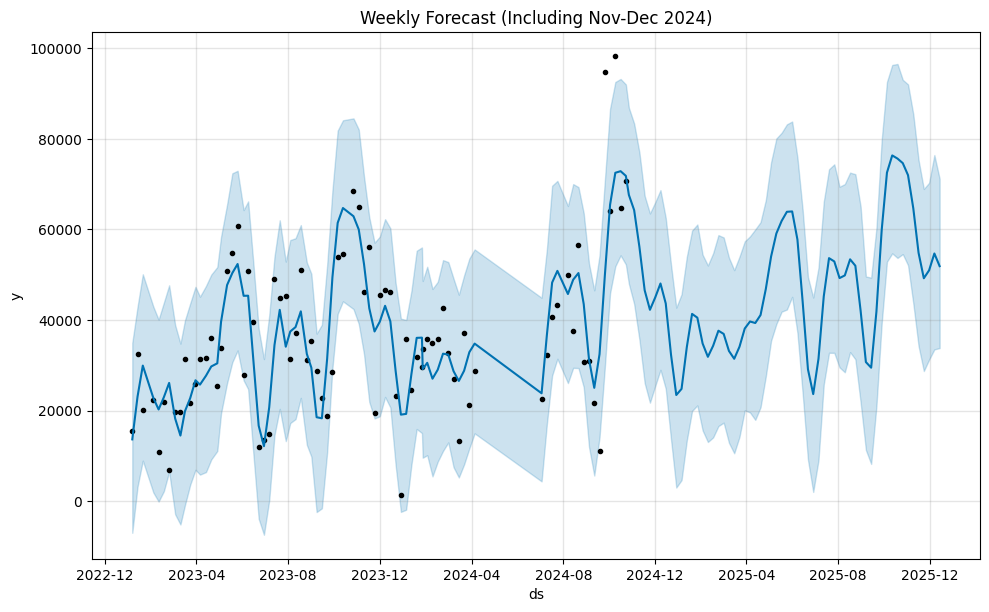

In [14]:
# Weekly forecast for Nov-Dec 2024
future_weekly = model.make_future_dataframe(periods=60, freq='W')
forecast_weekly = model.predict(future_weekly)

# Weekly Forecast Plot
plt.figure(figsize=(15, 8))
model.plot(forecast_weekly)
plt.title('Weekly Forecast (Including Nov-Dec 2024)')
plt.show()

<Figure size 1500x800 with 0 Axes>

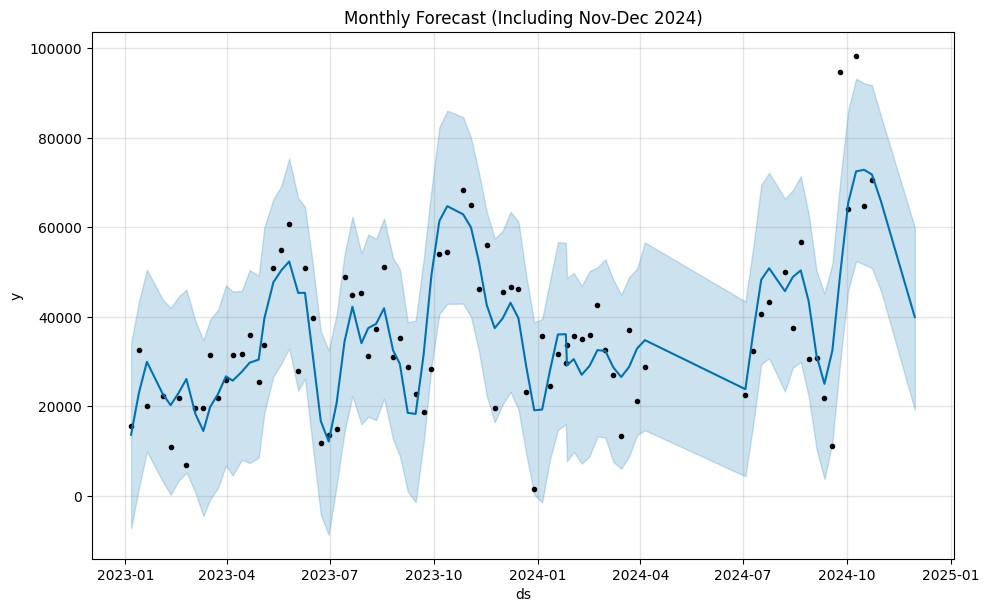

In [15]:
# Monthly forecast for Nov-Dec 2024
future_monthly = model.make_future_dataframe(periods=2, freq='M')
forecast_monthly = model.predict(future_monthly)

# Monthly Forecast Plot
plt.figure(figsize=(15, 8))
model.plot(forecast_monthly)
plt.title('Monthly Forecast (Including Nov-Dec 2024)')
plt.show()

<Figure size 1500x1200 with 0 Axes>

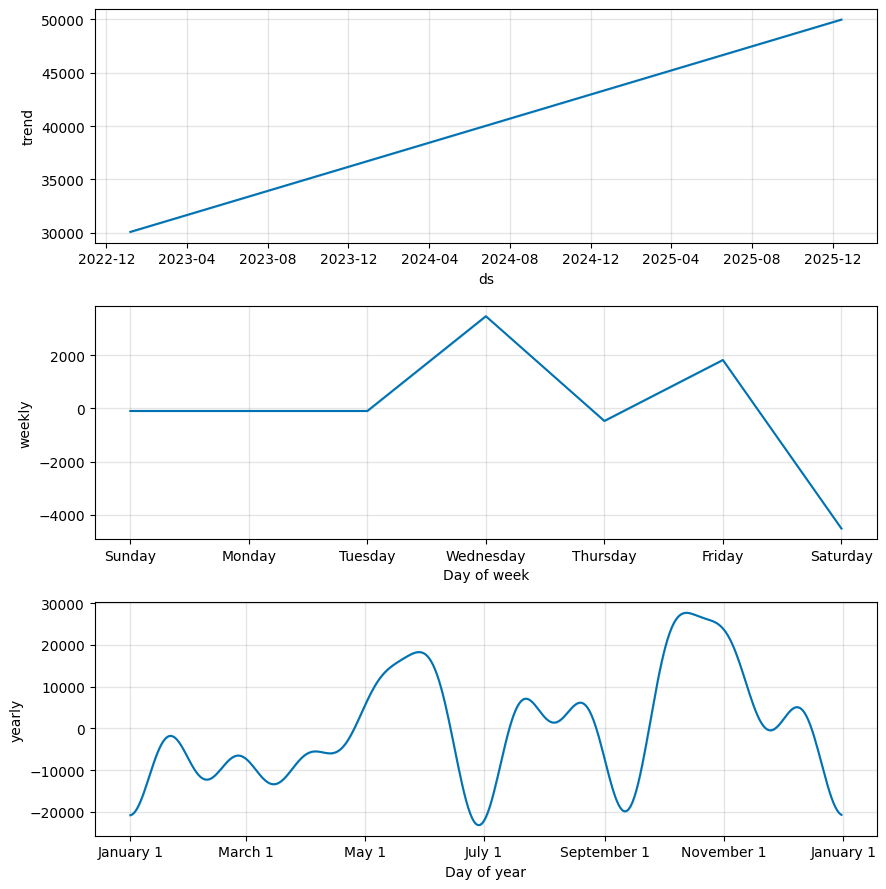

In [16]:
# Component Analysis
plt.figure(figsize=(15, 12))
model.plot_components(forecast_weekly)
plt.show()

In [17]:
# Print Weekly Forecast for Nov-Dec 2024
print("\nWeekly Forecast for Nov-Dec 2024:")
nov_dec_weekly = forecast_weekly[
    (forecast_weekly['ds'].dt.month.isin([11, 12])) &
    (forecast_weekly['ds'].dt.year == 2024)
][['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
print(nov_dec_weekly)


Weekly Forecast for Nov-Dec 2024:
           ds          yhat    yhat_lower    yhat_upper
82 2024-11-03  64270.407009  43552.074739  83398.144178
83 2024-11-10  56144.417681  35675.903519  77014.590620
84 2024-11-17  46558.131486  26065.926414  67421.847313
85 2024-11-24  42258.300271  21742.597565  63536.027081
86 2024-12-01  44978.571325  25431.115237  65992.487121
87 2024-12-08  48067.268012  28998.140373  68692.074626
88 2024-12-15  43654.222137  24819.431793  62543.995661
89 2024-12-22  32342.262497  13649.668899  52228.072349
90 2024-12-29  23435.309248   2995.807306  42731.447297


In [18]:
# Monthly Forecast for Nov-Dec 2024
print("\nMonthly Forecast for Nov-Dec 2024:")
nov_dec_monthly = forecast_monthly[
    (forecast_monthly['ds'].dt.month.isin([11, 12])) &
    (forecast_monthly['ds'].dt.year == 2024)
][['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
print(nov_dec_monthly)


Monthly Forecast for Nov-Dec 2024:
           ds          yhat    yhat_lower    yhat_upper
82 2024-11-30  39928.829933  19185.092698  59962.017612


In [19]:
#Error Analysis
# Error metrics for the training period
y_true = df['y']
y_pred = forecast_weekly['yhat'][:len(y_true)]

mae = np.mean(np.abs(y_true - y_pred))
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
rmse = np.sqrt(np.mean((y_true - y_pred)**2))

print("\nError Metrics:")
print(f"MAE: {mae:.2f}")
print(f"MAPE: {mape:.2f}%")
print(f"RMSE: {rmse:.2f}")


Error Metrics:
MAE: 7793.57
MAPE: 42.87%
RMSE: 10350.16


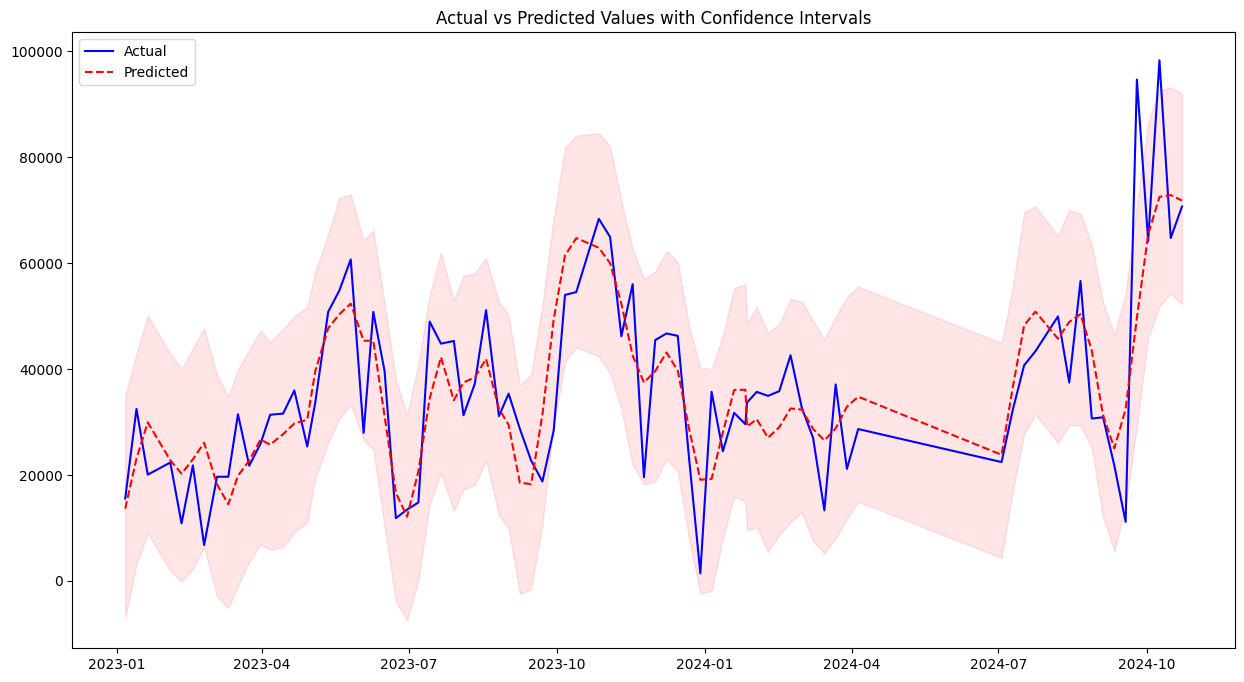

In [20]:
# Plot actual vs predicted
plt.figure(figsize=(15, 8))
plt.plot(df['ds'], df['y'], label='Actual', color='blue')
plt.plot(forecast_weekly['ds'][:len(df)], forecast_weekly['yhat'][:len(df)],
         label='Predicted', color='red', linestyle='--')
plt.fill_between(forecast_weekly['ds'][:len(df)],
                 forecast_weekly['yhat_lower'][:len(df)],
                 forecast_weekly['yhat_upper'][:len(df)],
                 color='red', alpha=0.1)
plt.title('Actual vs Predicted Values with Confidence Intervals')
plt.legend()
plt.show()

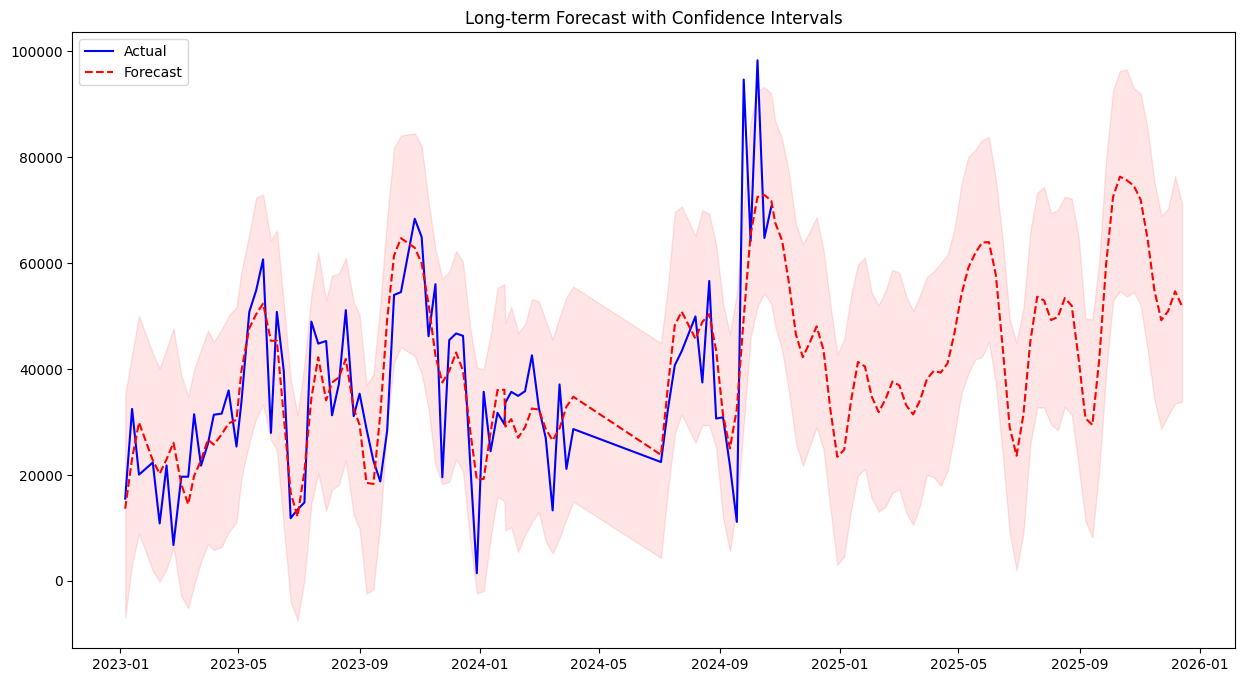

In [22]:
# Long-term forecast visualization
plt.figure(figsize=(15, 8))
plt.plot(df['ds'], df['y'], label='Actual', color='blue')
plt.plot(forecast_weekly['ds'], forecast_weekly['yhat'],
         label='Forecast', color='red', linestyle='--')
plt.fill_between(forecast_weekly['ds'],
                 forecast_weekly['yhat_lower'],
                 forecast_weekly['yhat_upper'],
                 color='red', alpha=0.1)
plt.title('Long-term Forecast with Confidence Intervals')
plt.legend()
plt.show()

In [23]:
import joblib

joblib.dump(model, 'cr_model.pkl')

['cr_model.pkl']